# Pandas Column Manipulation

In [63]:
import struct
import functools

import pyparsing as pp
import pandas    as pd
import numpy     as np

from pathlib  import Path
from icecream import ic

In [64]:
csvpath = Path("data/customers.csv")

In [65]:
df = pd.read_csv(csvpath)
df.head()

,FullName,Email,Address,Zip,CreditCard,Balance
0,Altha Frederick,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511
1,Nickolas Harvey,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850
2,Jesusita Kinney,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254
3,Mose Gordon,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221
4,Cesar Valentine,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300


In [66]:
df.applymap(lambda x: str.lower(x) if isinstance(x, str) else x)

,FullName,Email,Address,Zip,CreditCard,Balance
0,altha frederick,unhideable1966@gmail.com,67 john maher extension,31353,2524 2317 2139 4751,21511
1,nickolas harvey,allgood1803@outlook.com,1200 madera plaza,1922,4756 0997 9568 1329,13850
2,jesusita kinney,satsumas1954@yahoo.com,943 gibb highway,41535,3717 863466 48574,21254
3,mose gordon,antifowl1875@gmail.com,1073 fell trace,16098,5413 1700 6989 2835,5221
4,cesar valentine,acetaminol1979@yahoo.com,805 marshall promenade,99895,5173 4883 9215 4743,8300
...,...,...,...,...,...,...
95,crystle larson,plantula1818@live.com,1317 cesar chavez on brae,74413,3474 949615 85541,5091
96,jetta davenport,doolittle1818@yandex.com,618 williams terrace,73152,4711 5533 4972 2249,16509
97,dallas johnston,mosso1961@live.com,324 tenny line,88215,3794 280688 77410,24196
98,roberto daugherty,ovenful1914@yandex.com,1058 marengo manor,33903,4972 5355 6633 9108,18828


In [67]:
def lower_elements(df, cols):
    if not isinstance(cols, list):
        cols = [cols,]
    
    for col in cols:
        idx_col = df.columns==col

        for idx_row, name in enumerate(df.loc[:,col]):
            df.iloc[idx_row,idx_col] = str.lower(name)
        
    return df

In [68]:
def upper_every_other_element(df, cols):    
    if not isinstance(cols, list):
        cols = [cols,]
    
    for col in cols:    
        idx_col = df.columns==col

        for idx_row, _row in enumerate(df.loc[:,col]):
            new_str = ''
            for idx_char, _char in enumerate(_row):
                if not idx_char % 2:
                    new_str += _char
                else:
                    new_str += str.upper(_char)

            df.iloc[idx_row,idx_col] = new_str
        
    return df

In [69]:
def upper_first_element(df, cols):
    if not isinstance(cols, list):
        cols = [cols,]
    
    for col in cols:
        idx_col = df.columns==col

        for idx_row, _row in enumerate(df.loc[:,col]):
            new_str = ''
            for idx_char, _char in enumerate(_row):
                if not idx_char:
                    new_str += str.upper(_char)
                else:
                    new_str += _char

            df.iloc[idx_row,idx_col] = new_str
        
    return df

In [70]:
# %%timeit
# 1.01 ms ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
df.loc[:,['FullName',]].applymap(lambda x: str.lower(x))

,FullName
0,altha frederick
1,nickolas harvey
2,jesusita kinney
3,mose gordon
4,cesar valentine
...,...
95,crystle larson
96,jetta davenport
97,dallas johnston
98,roberto daugherty


In [71]:
# %%timeit
# 179 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
df['FullName'].apply(str.lower)

0       altha frederick
1       nickolas harvey
2       jesusita kinney
3           mose gordon
4       cesar valentine
            ...        
95       crystle larson
96      jetta davenport
97      dallas johnston
98    roberto daugherty
99         abel walters
Name: FullName, Length: 100, dtype: object

In [72]:
# %%timeit -r 7 n 10
# 39.4 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
df.pipe(lower_elements, cols='FullName').pipe(upper_every_other_element, cols='FullName')

,FullName,Email,Address,Zip,CreditCard,Balance
0,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511
1,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850
2,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300
...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828


In [73]:
# %%timeit
# 26 µs ± 990 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[str.lower(name) for name in df['FullName']]

['altha frederick',
 'nickolas harvey',
 'jesusita kinney',
 'mose gordon',
 'cesar valentine',
 'erich wooten',
 'elias ayers',
 'boris macdonald',
 'emilio bird',
 'vincenza patel',
 'norberto pollard',
 'kristeen hutchinson',
 'jestine mcdowell',
 'emerson hatfield',
 'marcos gilmore',
 'malik velez',
 'estell mcknight',
 'lilla navarro',
 'kallie mcfarland',
 'isiah alexander',
 'ronny bowen',
 'chauncey robles',
 'travis dalton',
 'lane holden',
 'flavia robertson',
 'roy leblanc',
 'phebe miranda',
 'annis cummings',
 'jamaal bradley',
 'patrick bishop',
 'saul keller',
 'salley mathews',
 'oretha woodward',
 'michel sullivan',
 'madelaine sampson',
 'rebecka haynes',
 'norris barnes',
 'jeffie phelps',
 'dante tanner',
 'bill keith',
 'vincenzo mullen',
 'tandy osborne',
 'robin rogers',
 'murray elliott',
 'rodrigo battle',
 'herma huff',
 'hang koch',
 'alfredo sanford',
 'weldon hancock',
 'fausto stevens',
 'jacquie cervantes',
 'octavio pugh',
 'kattie buckley',
 'waltraud 

In [74]:
ic(df.loc[0::20,['Zip',]])
ic(df.loc[0::20,'Zip':'CreditCard'])
ic(df.iloc[0::20,3])
ic(df.loc[0::20,'Zip'])
print()

ic| df.loc[0::20,['Zip',]]:       Zip
                            0   31353
                            20  17749
                            40  77825
                            60   9706
                            80  43825
ic| df.loc[0::20,'Zip':'CreditCard']:       Zip           CreditCard
                                      0   31353  2524 2317 2139 4751
                                      20  17749    3408 704958 51110
                                      40  77825  5306 6276 1905 9850
                                      60   9706  4799 3290 7476 1180
                                      80  43825  5408 2428 3615 4406
ic| df.iloc[0::20,3]: 0     31353
                      20    17749
                      40    77825
                      60     9706
                      80    43825
                      Name: Zip, dtype: int64
ic| df.loc[0::20,'Zip']: 0     31353
                         20    17749
                         40    77825
                         60    

### Replace Columns

In [75]:
# Display column names
ic(df.columns)
print()

ic| df.columns: Index(['FullName', 'Email', 'Address', 'Zip', 'CreditCard', 'Balance'], dtype='object')


In [76]:
# Rewrite the column names
df = df.rename(columns=lambda x: x.upper())
df

,FULLNAME,EMAIL,ADDRESS,ZIP,CREDITCARD,BALANCE
0,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511
1,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850
2,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300
...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828


### Rename Columns

In [77]:
df_renamed = df.rename(columns=lambda x: f"{x}_rename")
df_renamed

,FULLNAME_rename,EMAIL_rename,ADDRESS_rename,ZIP_rename,CREDITCARD_rename,BALANCE_rename
0,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511
1,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850
2,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300
...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828


### Reorder Columns

In [78]:
df.loc[:,"BALANCE"::-1]
# df.loc[:,df.columns[-1]::-1] # Same as above.

,BALANCE,CREDITCARD,ZIP,ADDRESS,EMAIL,FULLNAME
0,21511,2524 2317 2139 4751,31353,67 John Maher Extension,unhideable1966@gmail.com,aLtHa fReDeRiCk
1,13850,4756 0997 9568 1329,1922,1200 Madera Plaza,allgood1803@outlook.com,nIcKoLaS HaRvEy
2,21254,3717 863466 48574,41535,943 Gibb Highway,satsumas1954@yahoo.com,jEsUsItA KiNnEy
3,5221,5413 1700 6989 2835,16098,1073 Fell Trace,antifowl1875@gmail.com,mOsE GoRdOn
4,8300,5173 4883 9215 4743,99895,805 Marshall Promenade,acetaminol1979@yahoo.com,cEsAr vAlEnTiNe
...,...,...,...,...,...,...
95,5091,3474 949615 85541,74413,1317 Cesar Chavez On Brae,plantula1818@live.com,cRyStLe lArSoN
96,16509,4711 5533 4972 2249,73152,618 Williams Terrace,doolittle1818@yandex.com,jEtTa dAvEnPoRt
97,24196,3794 280688 77410,88215,324 Tenny Line,mosso1961@live.com,dAlLaS JoHnStOn
98,18828,4972 5355 6633 9108,33903,1058 Marengo Manor,ovenful1914@yandex.com,rObErTo dAuGhErTy


In [79]:
df.iloc[:, -1::-1]

,BALANCE,CREDITCARD,ZIP,ADDRESS,EMAIL,FULLNAME
0,21511,2524 2317 2139 4751,31353,67 John Maher Extension,unhideable1966@gmail.com,aLtHa fReDeRiCk
1,13850,4756 0997 9568 1329,1922,1200 Madera Plaza,allgood1803@outlook.com,nIcKoLaS HaRvEy
2,21254,3717 863466 48574,41535,943 Gibb Highway,satsumas1954@yahoo.com,jEsUsItA KiNnEy
3,5221,5413 1700 6989 2835,16098,1073 Fell Trace,antifowl1875@gmail.com,mOsE GoRdOn
4,8300,5173 4883 9215 4743,99895,805 Marshall Promenade,acetaminol1979@yahoo.com,cEsAr vAlEnTiNe
...,...,...,...,...,...,...
95,5091,3474 949615 85541,74413,1317 Cesar Chavez On Brae,plantula1818@live.com,cRyStLe lArSoN
96,16509,4711 5533 4972 2249,73152,618 Williams Terrace,doolittle1818@yandex.com,jEtTa dAvEnPoRt
97,24196,3794 280688 77410,88215,324 Tenny Line,mosso1961@live.com,dAlLaS JoHnStOn
98,18828,4972 5355 6633 9108,33903,1058 Marengo Manor,ovenful1914@yandex.com,rObErTo dAuGhErTy


In [80]:
df[df.columns[::-1]]

,BALANCE,CREDITCARD,ZIP,ADDRESS,EMAIL,FULLNAME
0,21511,2524 2317 2139 4751,31353,67 John Maher Extension,unhideable1966@gmail.com,aLtHa fReDeRiCk
1,13850,4756 0997 9568 1329,1922,1200 Madera Plaza,allgood1803@outlook.com,nIcKoLaS HaRvEy
2,21254,3717 863466 48574,41535,943 Gibb Highway,satsumas1954@yahoo.com,jEsUsItA KiNnEy
3,5221,5413 1700 6989 2835,16098,1073 Fell Trace,antifowl1875@gmail.com,mOsE GoRdOn
4,8300,5173 4883 9215 4743,99895,805 Marshall Promenade,acetaminol1979@yahoo.com,cEsAr vAlEnTiNe
...,...,...,...,...,...,...
95,5091,3474 949615 85541,74413,1317 Cesar Chavez On Brae,plantula1818@live.com,cRyStLe lArSoN
96,16509,4711 5533 4972 2249,73152,618 Williams Terrace,doolittle1818@yandex.com,jEtTa dAvEnPoRt
97,24196,3794 280688 77410,88215,324 Tenny Line,mosso1961@live.com,dAlLaS JoHnStOn
98,18828,4972 5355 6633 9108,33903,1058 Marengo Manor,ovenful1914@yandex.com,rObErTo dAuGhErTy


In [81]:
df.loc[:, ['BALANCE', 'CREDITCARD', 'ZIP',] + ['FULLNAME', 'EMAIL', 'ADDRESS',]]

,BALANCE,CREDITCARD,ZIP,FULLNAME,EMAIL,ADDRESS
0,21511,2524 2317 2139 4751,31353,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension
1,13850,4756 0997 9568 1329,1922,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza
2,21254,3717 863466 48574,41535,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway
3,5221,5413 1700 6989 2835,16098,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace
4,8300,5173 4883 9215 4743,99895,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade
...,...,...,...,...,...,...
95,5091,3474 949615 85541,74413,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae
96,16509,4711 5533 4972 2249,73152,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace
97,24196,3794 280688 77410,88215,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line
98,18828,4972 5355 6633 9108,33903,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor


In [82]:
df.loc[:,"BALANCE":"ZIP":-1].join(df.loc[:,"FULLNAME":"ADDRESS"])

,BALANCE,CREDITCARD,ZIP,FULLNAME,EMAIL,ADDRESS
0,21511,2524 2317 2139 4751,31353,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension
1,13850,4756 0997 9568 1329,1922,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza
2,21254,3717 863466 48574,41535,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway
3,5221,5413 1700 6989 2835,16098,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace
4,8300,5173 4883 9215 4743,99895,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade
...,...,...,...,...,...,...
95,5091,3474 949615 85541,74413,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae
96,16509,4711 5533 4972 2249,73152,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace
97,24196,3794 280688 77410,88215,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line
98,18828,4972 5355 6633 9108,33903,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor


In [83]:
df.iloc[:,-1:-4:-1].join(df.iloc[:,0:-3])

,BALANCE,CREDITCARD,ZIP,FULLNAME,EMAIL,ADDRESS
0,21511,2524 2317 2139 4751,31353,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension
1,13850,4756 0997 9568 1329,1922,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza
2,21254,3717 863466 48574,41535,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway
3,5221,5413 1700 6989 2835,16098,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace
4,8300,5173 4883 9215 4743,99895,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade
...,...,...,...,...,...,...
95,5091,3474 949615 85541,74413,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae
96,16509,4711 5533 4972 2249,73152,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace
97,24196,3794 280688 77410,88215,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line
98,18828,4972 5355 6633 9108,33903,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor


### Create Columns

In [84]:
# df['UPPER_FULLNAME'] = df

df['UPPER_FULLNAME'] = df['FULLNAME'].apply(str.upper)
df

,FULLNAME,EMAIL,ADDRESS,ZIP,CREDITCARD,BALANCE,UPPER_FULLNAME
0,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511,ALTHA FREDERICK
1,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850,NICKOLAS HARVEY
2,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254,JESUSITA KINNEY
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221,MOSE GORDON
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300,CESAR VALENTINE
...,...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091,CRYSTLE LARSON
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509,JETTA DAVENPORT
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196,DALLAS JOHNSTON
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828,ROBERTO DAUGHERTY


In [85]:
df['EMPTY'] = None
df

,FULLNAME,EMAIL,ADDRESS,ZIP,CREDITCARD,BALANCE,UPPER_FULLNAME,EMPTY
0,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511,ALTHA FREDERICK,None
1,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850,NICKOLAS HARVEY,None
2,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254,JESUSITA KINNEY,None
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221,MOSE GORDON,None
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300,CESAR VALENTINE,None
...,...,...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091,CRYSTLE LARSON,None
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509,JETTA DAVENPORT,None
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196,DALLAS JOHNSTON,None
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828,ROBERTO DAUGHERTY,None


### Split Columns

In [86]:
# %%timeit
# 470 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
# df['FIRSTNAME'], df['LASTNAME'] = zip(*df['FULLNAME'].map(str.split))

# 268 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
df['FIRSTNAME'], df['LASTNAME'] = zip(*[x.split() for x in df['FULLNAME']])

cols = ['FIRSTNAME','LASTNAME']
df.pipe(lower_elements, cols=cols).pipe(upper_first_element, cols=cols)

df.assign(LAST4=lambda x: [x[-4:] for x in df['CREDITCARD']])

,FULLNAME,EMAIL,ADDRESS,ZIP,CREDITCARD,BALANCE,UPPER_FULLNAME,EMPTY,FIRSTNAME,LASTNAME,LAST4
0,aLtHa fReDeRiCk,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511,ALTHA FREDERICK,None,Altha,Frederick,4751
1,nIcKoLaS HaRvEy,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850,NICKOLAS HARVEY,None,Nickolas,Harvey,1329
2,jEsUsItA KiNnEy,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254,JESUSITA KINNEY,None,Jesusita,Kinney,8574
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221,MOSE GORDON,None,Mose,Gordon,2835
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300,CESAR VALENTINE,None,Cesar,Valentine,4743
...,...,...,...,...,...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091,CRYSTLE LARSON,None,Crystle,Larson,5541
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509,JETTA DAVENPORT,None,Jetta,Davenport,2249
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196,DALLAS JOHNSTON,None,Dallas,Johnston,7410
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828,ROBERTO DAUGHERTY,None,Roberto,Daugherty,9108


In [87]:
# %%timeit
# 2.35 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
df.loc[0:2, 'FULLNAME'] = ['Jason J Garcia', 'Tessa M Garcia', 'Rachel Evangelista Tristan SanDiego']

name             = pp.Word(pp.alphas)
expr             = name[0, ...]
full_name_parser = lambda x: [x for x in expr.parseString(x)]
parsed_names     = [full_name_parser(x) for x in df['FULLNAME']]

df['pFIRSTNAME'], df['pLASTNAME'] = zip(*[[x[0], x[-1]] for x in parsed_names])
df

,FULLNAME,EMAIL,ADDRESS,ZIP,CREDITCARD,BALANCE,UPPER_FULLNAME,EMPTY,FIRSTNAME,LASTNAME,pFIRSTNAME,pLASTNAME
0,Jason J Garcia,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511,ALTHA FREDERICK,None,Altha,Frederick,Jason,Garcia
1,Tessa M Garcia,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850,NICKOLAS HARVEY,None,Nickolas,Harvey,Tessa,Garcia
2,Rachel Evangelista Tristan SanDiego,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254,JESUSITA KINNEY,None,Jesusita,Kinney,Rachel,SanDiego
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221,MOSE GORDON,None,Mose,Gordon,mOsE,GoRdOn
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300,CESAR VALENTINE,None,Cesar,Valentine,cEsAr,vAlEnTiNe
...,...,...,...,...,...,...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091,CRYSTLE LARSON,None,Crystle,Larson,cRyStLe,lArSoN
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509,JETTA DAVENPORT,None,Jetta,Davenport,jEtTa,dAvEnPoRt
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196,DALLAS JOHNSTON,None,Dallas,Johnston,dAlLaS,JoHnStOn
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828,ROBERTO DAUGHERTY,None,Roberto,Daugherty,rObErTo,dAuGhErTy


### Delete Columns

In [88]:
df = df.drop(columns=['FIRSTNAME', 'LASTNAME'])

In [89]:
df = df.drop('EMPTY', axis=1)
df

,FULLNAME,EMAIL,ADDRESS,ZIP,CREDITCARD,BALANCE,UPPER_FULLNAME,pFIRSTNAME,pLASTNAME
0,Jason J Garcia,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511,ALTHA FREDERICK,Jason,Garcia
1,Tessa M Garcia,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850,NICKOLAS HARVEY,Tessa,Garcia
2,Rachel Evangelista Tristan SanDiego,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254,JESUSITA KINNEY,Rachel,SanDiego
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221,MOSE GORDON,mOsE,GoRdOn
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300,CESAR VALENTINE,cEsAr,vAlEnTiNe
...,...,...,...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091,CRYSTLE LARSON,cRyStLe,lArSoN
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509,JETTA DAVENPORT,jEtTa,dAvEnPoRt
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196,DALLAS JOHNSTON,dAlLaS,JoHnStOn
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828,ROBERTO DAUGHERTY,rObErTo,dAuGhErTy


In [90]:
df = df.rename(columns={"pFIRSTNAME": "FIRSTNAME", "pLASTNAME": "LASTNAME"})
df

,FULLNAME,EMAIL,ADDRESS,ZIP,CREDITCARD,BALANCE,UPPER_FULLNAME,FIRSTNAME,LASTNAME
0,Jason J Garcia,unhideable1966@gmail.com,67 John Maher Extension,31353,2524 2317 2139 4751,21511,ALTHA FREDERICK,Jason,Garcia
1,Tessa M Garcia,allgood1803@outlook.com,1200 Madera Plaza,1922,4756 0997 9568 1329,13850,NICKOLAS HARVEY,Tessa,Garcia
2,Rachel Evangelista Tristan SanDiego,satsumas1954@yahoo.com,943 Gibb Highway,41535,3717 863466 48574,21254,JESUSITA KINNEY,Rachel,SanDiego
3,mOsE GoRdOn,antifowl1875@gmail.com,1073 Fell Trace,16098,5413 1700 6989 2835,5221,MOSE GORDON,mOsE,GoRdOn
4,cEsAr vAlEnTiNe,acetaminol1979@yahoo.com,805 Marshall Promenade,99895,5173 4883 9215 4743,8300,CESAR VALENTINE,cEsAr,vAlEnTiNe
...,...,...,...,...,...,...,...,...,...
95,cRyStLe lArSoN,plantula1818@live.com,1317 Cesar Chavez On Brae,74413,3474 949615 85541,5091,CRYSTLE LARSON,cRyStLe,lArSoN
96,jEtTa dAvEnPoRt,doolittle1818@yandex.com,618 Williams Terrace,73152,4711 5533 4972 2249,16509,JETTA DAVENPORT,jEtTa,dAvEnPoRt
97,dAlLaS JoHnStOn,mosso1961@live.com,324 Tenny Line,88215,3794 280688 77410,24196,DALLAS JOHNSTON,dAlLaS,JoHnStOn
98,rObErTo dAuGhErTy,ovenful1914@yandex.com,1058 Marengo Manor,33903,4972 5355 6633 9108,18828,ROBERTO DAUGHERTY,rObErTo,dAuGhErTy


#### Exporting a Dataframe

In [91]:
df.to_csv('data/customer_reworked_by_jason.csv', index=False)

In [92]:
import pandas as pd

goog_df = pd.DataFrame({"AAPL": [1045.85, 1070.08, 1140.99, 1113.65, 1193.32, 1231.54, 1215.00, 1207.15,1248.84, 1166.27, 1138.85, 1003.63, 1080.91]})

goog_df.describe()

,AAPL
count,13.000000
mean,1142.775385
std,76.556568
min,1003.630000
25%,1080.910000
50%,1140.990000
75%,1207.150000
max,1248.840000


### Course Notes

Use the `iloc` function and the range syntax to return the last three elements of the `aapl_returns` DataFrame. Try to do this task by using at least two forms of the range syntax.

In [93]:
aapl_returns = pd.DataFrame({"AAPL": [0.5, 0.56, 0.59, 0.52, 0.1, 0.75, 0.47]})
aapl_returns

,AAPL
0,0.50
1,0.56
2,0.59
3,0.52
4,0.10
5,0.75
6,0.47


In [94]:
aapl_returns.iloc[-3:,:]

,AAPL
4,0.10
5,0.75
6,0.47


You can use integer-based location if you know the indexes you need. But, what if the area of interest is a date range in the middle of a huge DataFrame? The following code shows an example that uses 1,000 days of data from January 1, 2017 to September 27, 2019:

In [95]:
loans = pd.DataFrame(
    np.random.randint(low=1, high=1000, size=1000),
    index=pd.date_range('1/1/2017', periods=1000),
    columns=["JPM"])
loans.tail()

,JPM
2019-09-23,178
2019-09-24,936
2019-09-25,38
2019-09-26,816
2019-09-27,184


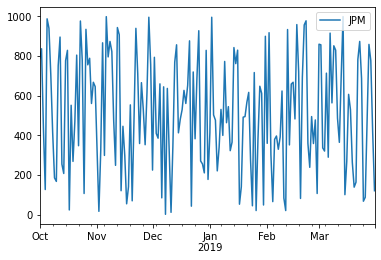

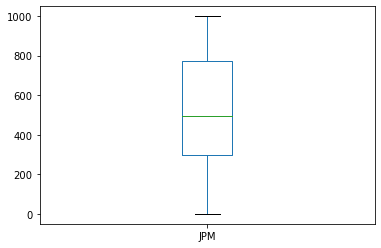

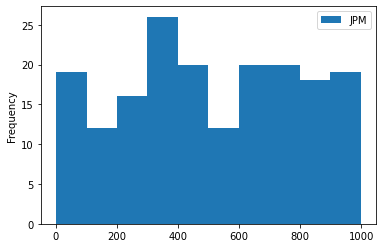

In [96]:
loans.loc['2018-10-01':'2019-03-31'].describe()
loans.loc['2018-10-01':'2019-03-31'].plot();
loans.loc['2018-10-01':'2019-03-31'].plot(kind="box");
loans.loc['2018-10-01':'2019-03-31'].plot(kind="hist");